### LINEAR REGRESSION 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [4]:
INFOSYS=pd.read_csv("D:/predict/data_techcom.csv")
INFOSYS.head()

,Date,Open,High,Low,Close,chance_price,percent_change,Volume
0,2024-05-21,48100.00,48200.00,47050.00,47200.00,-1000,-0.02,11258500
1,2024-05-20,48442.45,48975.86,48054.53,48200.00,-50,0.00,11449601
2,2024-05-17,48248.49,48490.95,48151.51,48248.49,-150,0.00,6610750
3,2024-05-16,47036.22,48442.45,46939.24,48393.96,1800,0.04,21363102
4,2024-05-15,46454.33,46696.78,46308.85,46648.29,200,0.00,10026100


In [5]:
INFOSYS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1000 non-null   object 
 1   Open            1000 non-null   float64
 2   High            1000 non-null   float64
 3   Low             1000 non-null   float64
 4   Close           1000 non-null   float64
 5   chance_price    1000 non-null   int64  
 6   percent_change  1000 non-null   float64
 7   Volume          1000 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 62.6+ KB


In [6]:
INFOSYS.isnull()

,Date,Open,High,Low,Close,chance_price,percent_change,Volume
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [7]:
INFOSYS.isnull().sum()

Date              0
Open              0
High              0
Low               0
Close             0
chance_price      0
percent_change    0
Volume            0
dtype: int64

In [8]:
INFOSYS.isnull().sum().sum()

0

In [9]:
INFOSYS.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'chance_price',
       'percent_change', 'Volume'],
      dtype='object')

In [10]:
np.unique(INFOSYS["Date"])

array(['2020-05-21', '2020-05-22', '2020-05-25', '2020-05-26',
       '2020-05-27', '2020-05-28', '2020-05-29', '2020-06-01',
       '2020-06-02', '2020-06-03', '2020-06-04', '2020-06-05',
       '2020-06-08', '2020-06-09', '2020-06-10', '2020-06-11',
       '2020-06-12', '2020-06-15', '2020-06-16', '2020-06-17',
       '2020-06-18', '2020-06-19', '2020-06-22', '2020-06-23',
       '2020-06-24', '2020-06-25', '2020-06-26', '2020-06-29',
       '2020-06-30', '2020-07-01', '2020-07-02', '2020-07-03',
       '2020-07-06', '2020-07-07', '2020-07-08', '2020-07-09',
       '2020-07-10', '2020-07-13', '2020-07-14', '2020-07-15',
       '2020-07-16', '2020-07-17', '2020-07-20', '2020-07-21',
       '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-27',
       '2020-07-28', '2020-07-29', '2020-07-30', '2020-07-31',
       '2020-08-03', '2020-08-04', '2020-08-05', '2020-08-06',
       '2020-08-07', '2020-08-10', '2020-08-11', '2020-08-12',
       '2020-08-13', '2020-08-14', '2020-08-17', '2020-

In [11]:
np.unique(INFOSYS["Open"])

array([17650.7 , 17699.2 , 17747.69, 18329.58, 18523.54, 18717.51,
       18814.49, 18862.98, 18911.47, 18959.96, 19153.92, 19202.41,
       19347.89, 19396.38, 19493.36, 19590.34, 19638.83, 19687.32,
       19881.29, 19978.27, 20075.25, 20123.74, 20172.23, 20220.72,
       20269.22, 20317.71, 20366.2 , 20414.69, 20463.18, 20511.67,
       20560.16, 20608.65, 20657.14, 20705.63, 20754.12, 20851.11,
       20899.6 , 20948.09, 21045.07, 21093.56, 21142.05, 21190.54,
       21239.03, 21336.02, 21384.51, 21433.  , 21481.49, 21529.98,
       21578.47, 21626.96, 21675.45, 21723.94, 21772.43, 21820.93,
       21869.42, 21966.4 , 22014.89, 22160.36, 22208.85, 22257.34,
       22305.84, 22354.33, 22596.78, 22645.27, 22693.76, 22742.25,
       22790.74, 22887.73, 22936.22, 22984.71, 23033.2 , 23081.69,
       23227.16, 23275.65, 23372.64, 23469.62, 23663.58, 23760.56,
       23857.55, 23906.04, 24051.51, 24100.  , 24196.98, 24245.47,
       24342.45, 24439.44, 24536.42, 24681.89, 24730.38, 24827

In [12]:
np.unique(INFOSYS["High"])

array([17844.67, 18038.63, 18087.12, 18232.6 , 18426.56, 18523.54,
       18620.52, 18766.  , 18862.98, 18911.47, 18959.96, 19105.43,
       19202.41, 19250.91, 19299.4 , 19347.89, 19493.36, 19541.85,
       19590.34, 19638.83, 19687.32, 19784.31, 19832.8 , 19881.29,
       19929.78, 19978.27, 20026.76, 20123.74, 20172.23, 20317.71,
       20366.2 , 20463.18, 20560.16, 20608.65, 20657.14, 20754.12,
       20802.62, 20851.11, 20899.6 , 20948.09, 20996.58, 21045.07,
       21142.05, 21190.54, 21239.03, 21287.53, 21336.02, 21384.51,
       21433.  , 21529.98, 21578.47, 21626.96, 21675.45, 21723.94,
       21772.43, 21820.93, 21869.42, 21917.91, 22014.89, 22063.38,
       22160.36, 22208.85, 22305.84, 22354.33, 22402.82, 22451.31,
       22596.78, 22645.27, 22693.76, 22742.25, 22790.74, 22887.73,
       22936.22, 22984.71, 23081.69, 23178.67, 23227.16, 23275.65,
       23372.64, 23421.13, 23469.62, 23663.58, 23760.56, 23857.55,
       24051.51, 24100.  , 24148.49, 24196.98, 24245.47, 24342

In [13]:
np.unique(INFOSYS["Low"])

array([16971.83, 17456.74, 17602.21, 18135.61, 18184.1 , 18426.56,
       18475.05, 18523.54, 18717.51, 18862.98, 18911.47, 18959.96,
       19008.45, 19056.94, 19153.92, 19202.41, 19250.91, 19396.38,
       19444.87, 19493.36, 19541.85, 19590.34, 19638.83, 19687.32,
       19784.31, 19832.8 , 19881.29, 19929.78, 19978.27, 20026.76,
       20075.25, 20172.23, 20220.72, 20269.22, 20317.71, 20366.2 ,
       20414.69, 20463.18, 20511.67, 20560.16, 20608.65, 20657.14,
       20705.63, 20754.12, 20851.11, 20899.6 , 20948.09, 20996.58,
       21045.07, 21142.05, 21190.54, 21336.02, 21384.51, 21433.  ,
       21481.49, 21529.98, 21578.47, 21626.96, 21675.45, 21723.94,
       21869.42, 21917.91, 21966.4 , 22111.87, 22160.36, 22208.85,
       22305.84, 22402.82, 22499.8 , 22548.29, 22596.78, 22645.27,
       22693.76, 22790.74, 22839.24, 22936.22, 22984.71, 23033.2 ,
       23130.18, 23275.65, 23324.14, 23372.64, 23469.62, 23615.09,
       23809.05, 23857.55, 23906.04, 24003.02, 24051.51, 24148

In [14]:
np.unique(INFOSYS["Close"])

array([17602.21, 18038.63, 18184.1 , 18281.09, 18572.03, 18620.52,
       18814.49, 18862.98, 18911.47, 18959.96, 19056.94, 19153.92,
       19202.41, 19396.38, 19444.87, 19493.36, 19590.34, 19638.83,
       19687.32, 19735.81, 19832.8 , 19881.29, 19978.27, 20026.76,
       20075.25, 20123.74, 20269.22, 20317.71, 20366.2 , 20414.69,
       20463.18, 20511.67, 20560.16, 20657.14, 20705.63, 20754.12,
       20802.62, 20851.11, 20899.6 , 20948.09, 21045.07, 21142.05,
       21190.54, 21336.02, 21384.51, 21433.  , 21481.49, 21529.98,
       21578.47, 21626.96, 21675.45, 21723.94, 21772.43, 21869.42,
       21917.91, 21966.4 , 22014.89, 22063.38, 22111.87, 22160.36,
       22208.85, 22257.34, 22305.84, 22596.78, 22645.27, 22693.76,
       22887.73, 22936.22, 22984.71, 23033.2 , 23178.67, 23227.16,
       23275.65, 23372.64, 23421.13, 23615.09, 23663.58, 23760.56,
       23857.55, 24051.51, 24245.47, 24293.96, 24342.45, 24439.44,
       24536.42, 24730.38, 24875.86, 24924.35, 24972.84, 25021

In [15]:
np.unique(INFOSYS["chance_price"])

array([-3685, -3055, -3000, -2715, -2619, -2522, -2425, -2231, -2200,
       -2182, -1940, -1891, -1746, -1697, -1649, -1600, -1503, -1455,
       -1450, -1406, -1400, -1309, -1300, -1261, -1212, -1200, -1164,
       -1115, -1067, -1018, -1000,  -970,  -921,  -900,  -873,  -850,
        -824,  -800,  -776,  -750,  -727,  -700,  -679,  -650,  -630,
        -600,  -582,  -550,  -533,  -500,  -485,  -450,  -436,  -400,
        -388,  -350,  -339,  -300,  -291,  -250,  -242,  -200,  -194,
        -150,  -145,  -100,   -97,   -50,   -48,     0,    48,    50,
          97,   100,   145,   150,   194,   200,   242,   250,   291,
         300,   339,   350,   388,   400,   436,   450,   485,   500,
         533,   550,   582,   600,   630,   650,   679,   700,   727,
         750,   776,   800,   824,   850,   873,   900,   921,   950,
         970,  1000,  1018,  1050,  1067,  1100,  1115,  1150,  1164,
        1200,  1212,  1250,  1261,  1300,  1309,  1350,  1358,  1406,
        1455,  1503,

In [16]:
np.unique(INFOSYS["percent_change"])

array([-0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02, -0.01,  0.  ,
        0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.15])

In [17]:
np.unique(INFOSYS["Volume"])

array([  706630,   751460,   818210,   861140,   893390,   974910,
         981290,  1132620,  1164560,  1221740,  1247760,  1261940,
        1334060,  1524900,  1554400,  1611900,  1647960,  1655530,
        1662150,  1673900,  1684180,  1697190,  1759900,  1764919,
        1793790,  1809120,  1840720,  1841250,  1844880,  1860660,
        1877750,  1947900,  2069900,  2085901,  2116830,  2129800,
        2130100,  2189500,  2204200,  2208200,  2212340,  2216760,
        2263100,  2328490,  2332700,  2367220,  2394300,  2422800,
        2431900,  2460400,  2540930,  2566900,  2567100,  2588850,
        2592700,  2607980,  2611700,  2633000,  2665300,  2673490,
        2688010,  2696200,  2747200,  2749740,  2752600,  2762390,
        2763249,  2771900,  2773800,  2792601,  2810200,  2813300,
        2817084,  2817550,  2830450,  2867401,  2902000,  2922000,
        2972740,  3016910,  3019749,  3077650,  3095120,  3115170,
        3169000,  3176800,  3191130,  3210200,  3236501,  3260

In [18]:
INFOSYS["Date"].value_counts()

Date
2024-05-21    1
2021-09-09    1
2021-09-28    1
2021-09-27    1
2021-09-24    1
             ..
2023-01-05    1
2023-01-04    1
2023-01-03    1
2022-12-30    1
2020-05-21    1
Name: count, Length: 1000, dtype: int64

In [19]:
INFOSYS["Open"].value_counts()

Open
32973.84    9
48006.04    8
49460.76    7
48490.95    7
48975.86    7
           ..
36513.68    1
36562.17    1
36610.66    1
38404.83    1
20414.69    1
Name: count, Length: 461, dtype: int64

In [20]:
INFOSYS["High"].value_counts()

High
51400.40    10
48878.87     9
49266.80     9
30064.39     8
51691.35     7
            ..
24148.49     1
25069.82     1
24051.51     1
24100.00     1
20608.65     1
Name: count, Length: 467, dtype: int64

In [21]:
INFOSYS["Low"].value_counts()

Low
32973.84    10
49945.67     9
51206.44     7
48006.04     7
48490.95     6
            ..
37483.50     1
37580.48     1
37095.57     1
37531.99     1
20220.72     1
Name: count, Length: 459, dtype: int64

In [22]:
INFOSYS["Close"].value_counts()

Close
50042.66    8
33943.66    7
20657.14    7
31616.10    7
50721.53    7
           ..
31907.04    1
48054.53    1
31955.53    1
31373.64    1
47200.00    1
Name: count, Length: 456, dtype: int64

In [24]:
INFOSYS["chance_price"].value_counts()

chance_price
 0       54
-97      34
-194     30
 194     29
-291     24
         ..
-1891     1
-2182     1
-1406     1
 1018     1
 2328     1
Name: count, Length: 149, dtype: int64

In [25]:
INFOSYS["percent_change"].value_counts()

percent_change
 0.00    279
-0.01    201
 0.01    174
-0.02     90
 0.02     87
 0.03     51
-0.03     33
-0.04     18
 0.04     15
 0.06     12
 0.05      9
-0.07      8
-0.06      8
-0.05      7
 0.07      3
-0.08      2
 0.08      2
 0.15      1
Name: count, dtype: int64

In [26]:
INFOSYS["Volume"].value_counts()

Volume
8787900     2
7837800     2
11258500    1
7233564     1
7484700     1
           ..
6592300     1
3786800     1
5502900     1
3579700     1
3539410     1
Name: count, Length: 998, dtype: int64

In [23]:
INFOSYS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1.227000e+03
mean,605.359984,611.994194,598.518723,605.161715,557.417386,8.675740e+06
std,103.981567,105.130168,103.068678,104.111674,118.345056,7.941786e+06
min,440.000000,443.799988,430.000000,436.700012,390.604187,7.589560e+05
25%,514.187500,519.762482,509.349991,513.974976,451.269745,5.361510e+06
50%,586.025024,592.450012,580.000000,585.950012,517.107422,7.023516e+06
75%,704.924988,711.725006,695.975006,704.262512,676.590088,9.551616e+06
max,843.299988,847.000000,835.049988,840.150024,810.035217,1.644050e+08


In [27]:
INFOSYS_NEW=INFOSYS.dropna(axis = 0)
INFOSYS_NEW

,Date,Open,High,Low,Close,chance_price,percent_change,Volume
0,2024-05-21,48100.00,48200.00,47050.00,47200.00,-1000,-0.02,11258500
1,2024-05-20,48442.45,48975.86,48054.53,48200.00,-50,0.00,11449601
2,2024-05-17,48248.49,48490.95,48151.51,48248.49,-150,0.00,6610750
3,2024-05-16,47036.22,48442.45,46939.24,48393.96,1800,0.04,21363102
4,2024-05-15,46454.33,46696.78,46308.85,46648.29,200,0.00,10026100
...,...,...,...,...,...,...,...,...
995,2020-05-27,20560.16,20754.12,20269.22,20269.22,-291,-0.01,2673490
996,2020-05-26,20463.18,20657.14,20366.20,20511.67,48,0.00,2830450
997,2020-05-25,20463.18,20657.14,20317.71,20414.69,-48,0.00,2540930
998,2020-05-22,20948.09,20948.09,20414.69,20414.69,-533,-0.03,3672780


In [28]:
INFOSYS_NEW.isnull().sum()

Date              0
Open              0
High              0
Low               0
Close             0
chance_price      0
percent_change    0
Volume            0
dtype: int64

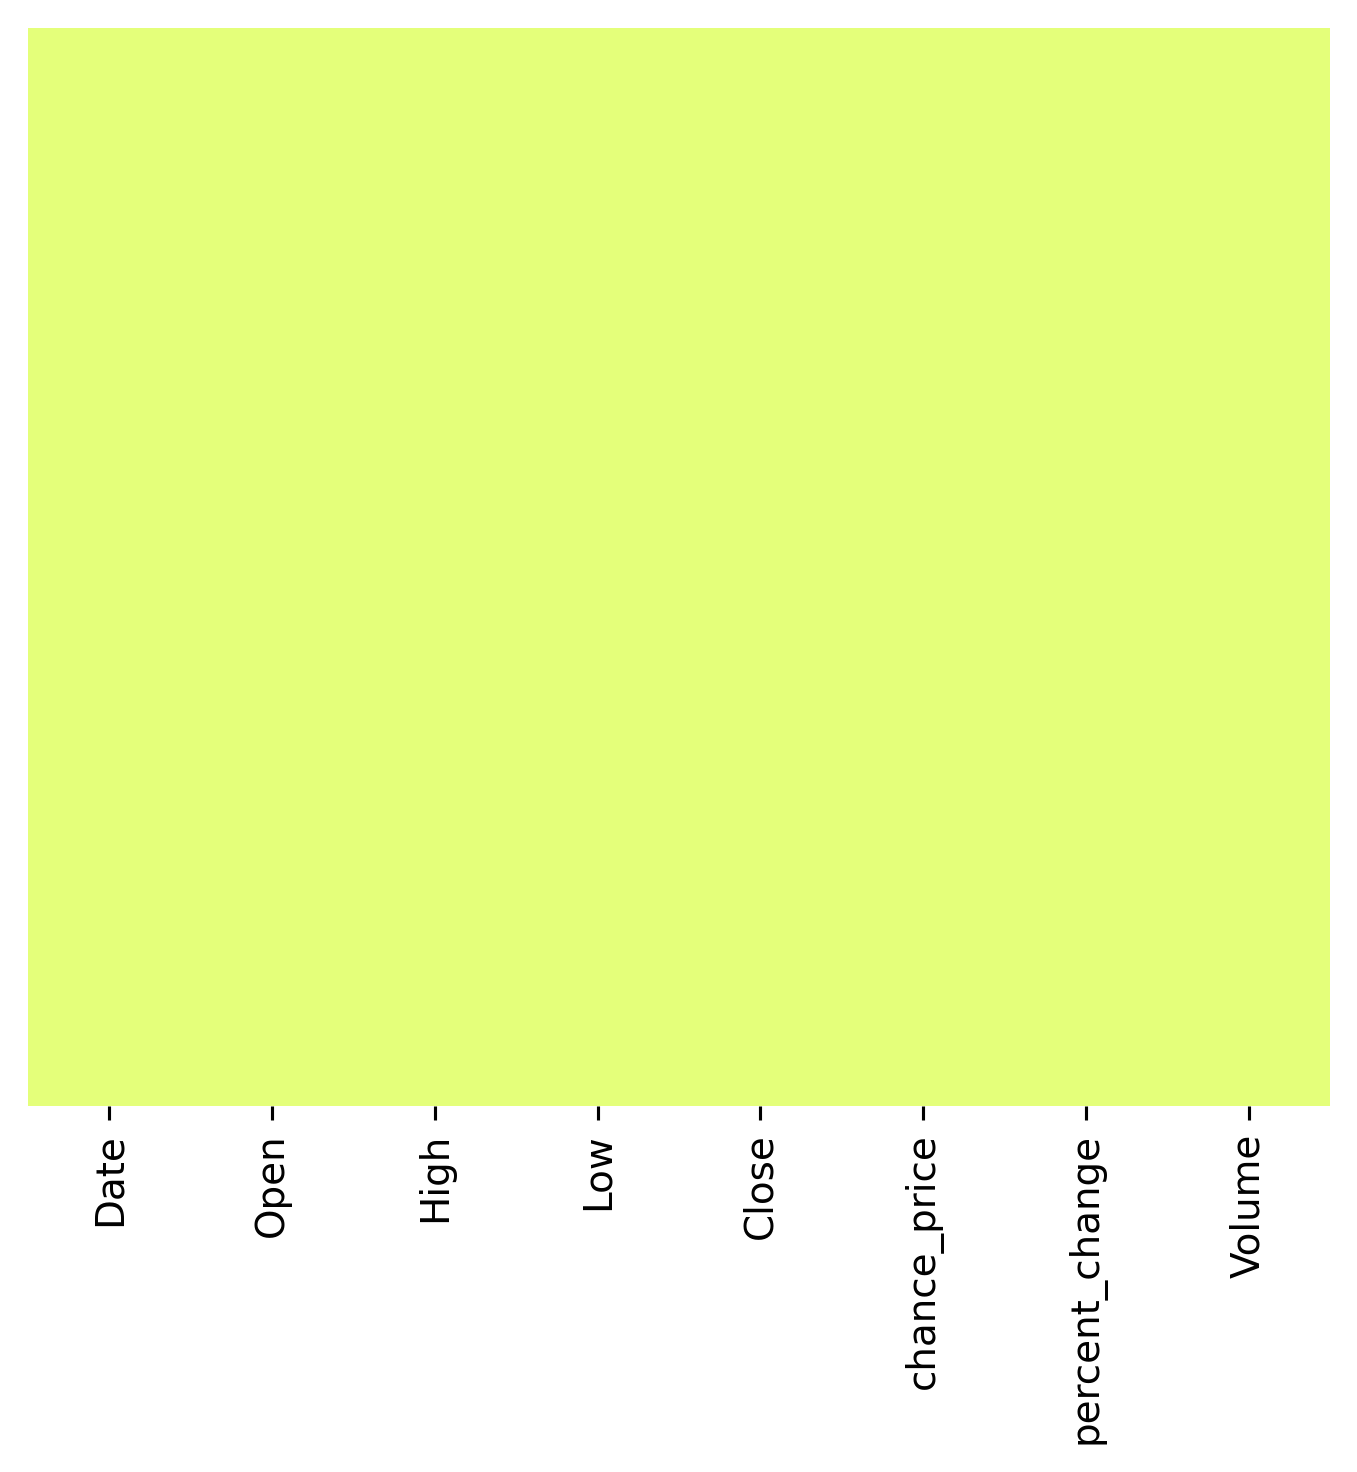

In [29]:
fig=plt.figure(figsize=(6,5),dpi=280)
sns.heatmap(INFOSYS_NEW.isnull(), yticklabels=False, cbar=False, cmap='Wistia')
plt.show()

### Hence, There is no missing values.

In [30]:
INFOSYS_NEW.describe()

,Open,High,Low,Close,chance_price,percent_change,Volume
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,35109.575150,35570.969640,34649.655380,35087.775620,-1.552000,0.000230,1.147617e+07
std,10126.757555,10239.304332,10016.929996,10109.106232,727.708741,0.021239,8.514470e+06
min,17650.700000,17844.670000,16971.830000,17602.210000,-3685.000000,-0.080000,7.066300e+05
25%,27239.787500,27639.840000,26742.755000,27154.930000,-350.000000,-0.010000,5.653875e+06
50%,33531.485000,34161.875000,32973.840000,33507.240000,0.000000,0.000000,9.064233e+06
75%,45981.542500,46587.677500,45399.652500,45933.052500,350.000000,0.010000,1.514422e+07
max,56055.530000,56831.390000,53921.930000,56249.500000,3103.000000,0.150000,7.498292e+07


In [31]:
INFOSYS_NEW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1000 non-null   object 
 1   Open            1000 non-null   float64
 2   High            1000 non-null   float64
 3   Low             1000 non-null   float64
 4   Close           1000 non-null   float64
 5   chance_price    1000 non-null   int64  
 6   percent_change  1000 non-null   float64
 7   Volume          1000 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 62.6+ KB


In [32]:
INFOSYS_NEW['Date']=pd.to_datetime(INFOSYS_NEW['Date'])

In [33]:
print(f'DataFrame contains Stock Prices between {INFOSYS_NEW.Date.min()} {INFOSYS_NEW.Date.max()}')
print(f'Total Days = {(INFOSYS_NEW.Date.max()- INFOSYS_NEW.Date.min()).days} days')

DataFrame contains Stock Prices between 2020-05-21 00:00:00 2024-05-21 00:00:00
Total Days = 1461 days


<Axes: >

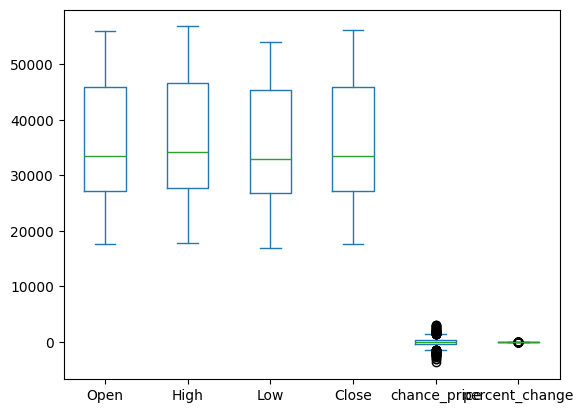

In [35]:
INFOSYS_NEW[['Open','High','Low','Close','chance_price','percent_change']].plot(kind='box')

In [36]:
layout = go.Layout(
    title='STOCK PRICE OF INFOSYS',
        xaxis=dict(
            title='date',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='blue'
            )
        ),
        yaxis=dict(
            title='Price',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='red'
        )
    )
)
INFOSYS_DATA = [{'x':INFOSYS_NEW['Date'], 'y':INFOSYS_NEW['Close']}]
plot = go.Figure(data=INFOSYS_DATA, layout=layout)

In [37]:
iplot(plot)

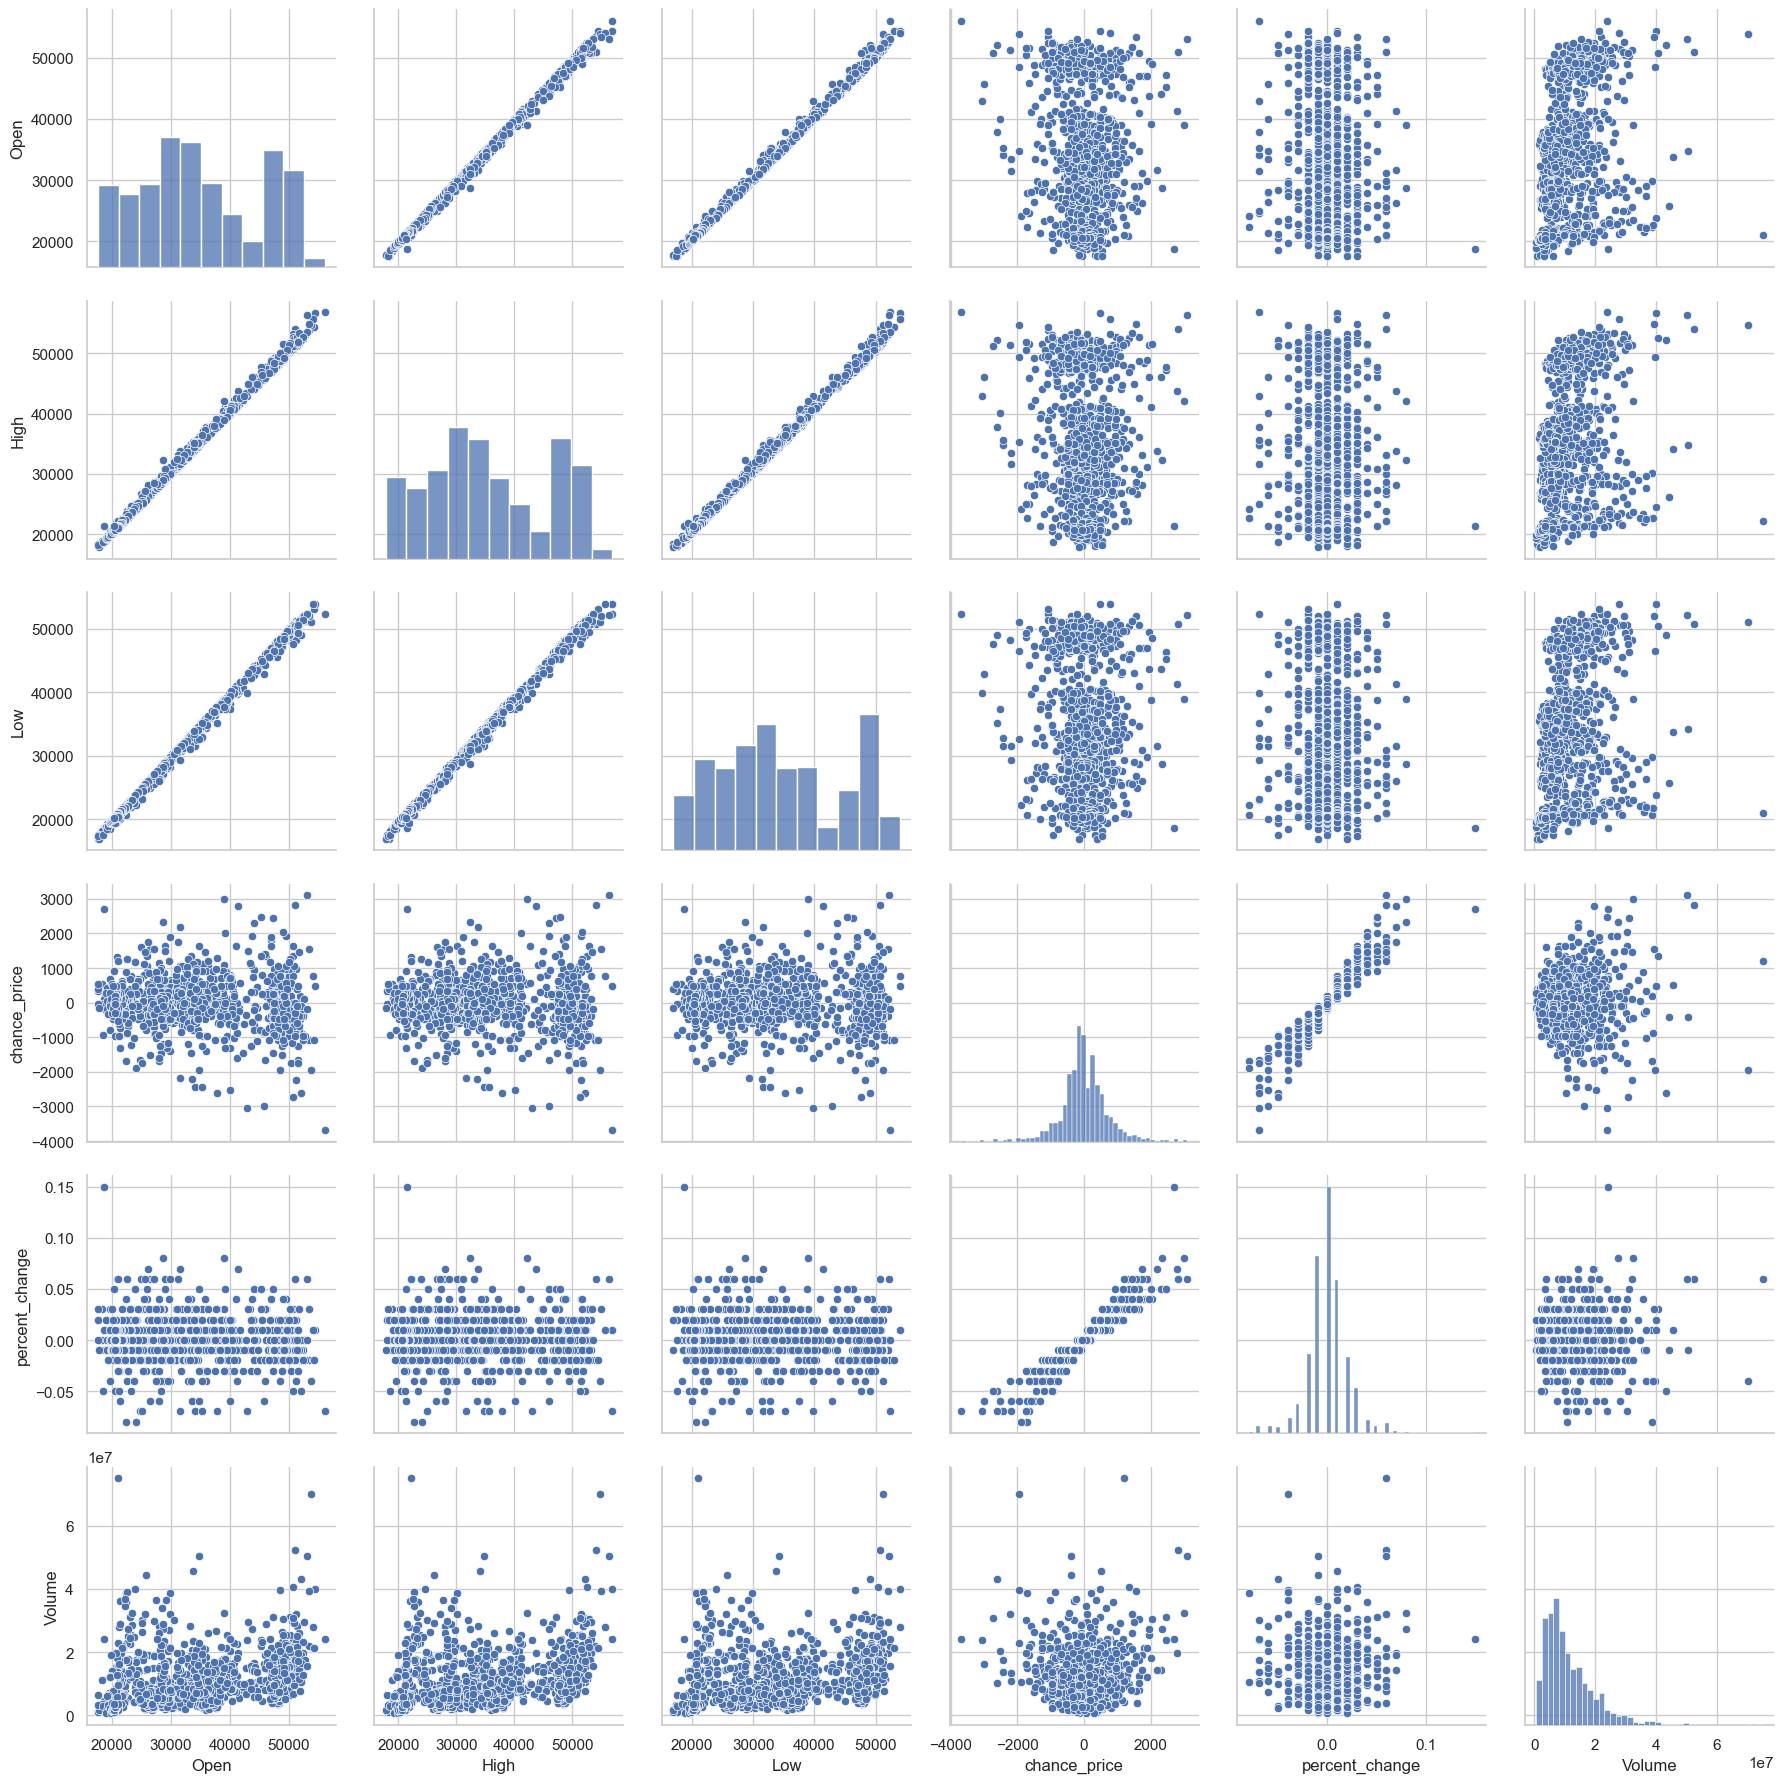

In [39]:
#fig=plt.figure(figsize=(2,2))
sns.set(style='whitegrid',context='notebook')
cols=['Date', 'Open', 'High', 'Low','chance_price', 'percent_change', 'Volume']
sns.pairplot(INFOSYS_NEW[cols],size=3)
plt.tight_layout()
plt.show()

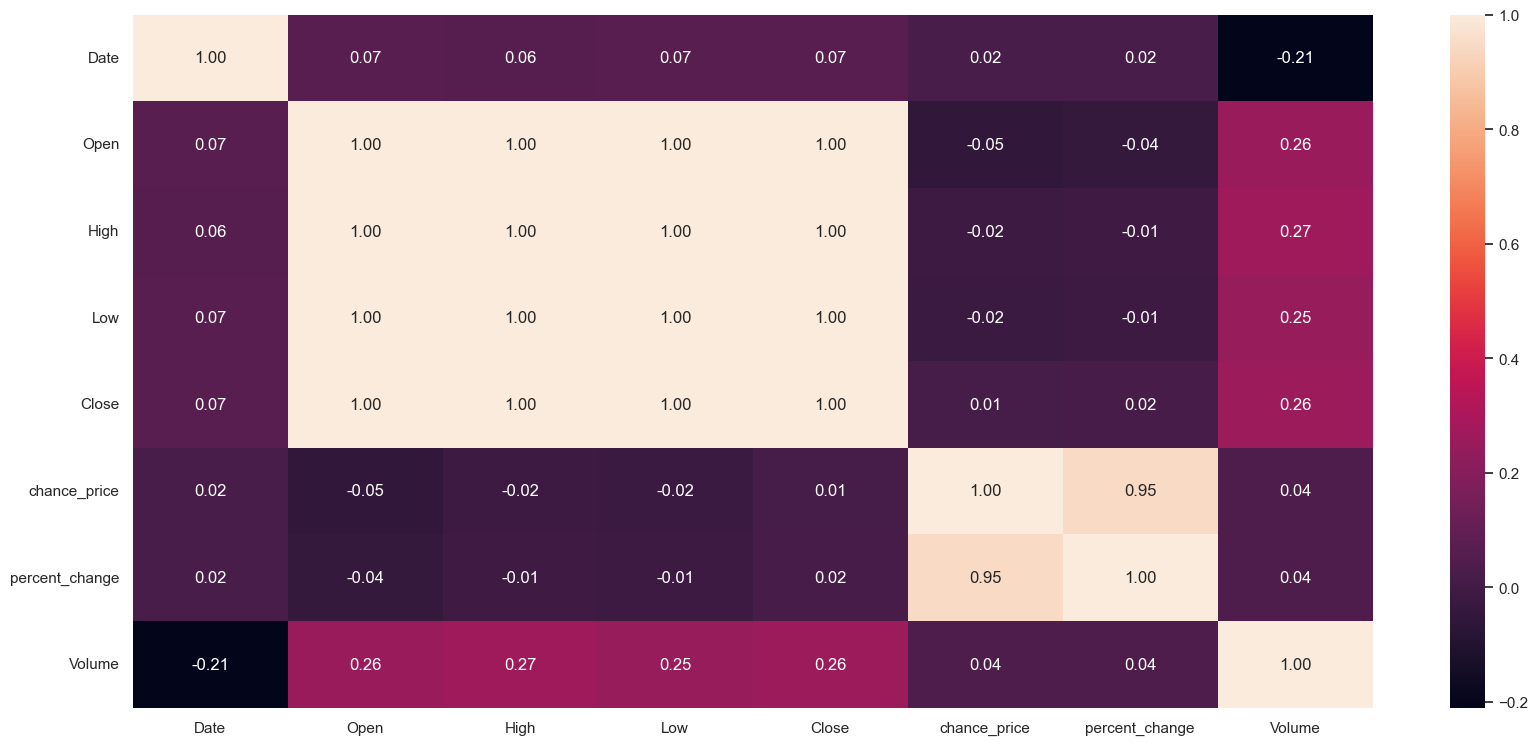

In [40]:
import seaborn as sns
corr = INFOSYS_NEW.corr()
plt.figure(figsize=(20,9))
a = sns.heatmap(corr, annot=True, fmt='.2f')


In [41]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [42]:
X= np.array(INFOSYS_NEW.index).reshape(-1,1)
Y= INFOSYS_NEW['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=101)


In [43]:
scaler = StandardScaler().fit(X_train)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
Model = LinearRegression()
Model.fit(X_train, Y_train)

LinearRegression()

In [46]:
Model.score(X_train, Y_train)

0.003542594577863989

In [47]:
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = Model.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)

INFOSYS_DATA = [trace0, trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=INFOSYS_DATA, layout=layout)

In [48]:
iplot(plot2)

In [49]:
Accuracy_With_LiearRegression = Model.score(X_train, Y_train)
Accuracy_With_LiearRegression

0.003542594577863989

In [50]:
scores = f''' 
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, Model.predict(X_train))}\t{r2_score(Y_test, Model.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, Model.predict(X_train))}\t{mse(Y_test, Model.predict(X_test))}
'''

print(scores)

 
Metric           Train                Test        
r2_score  0.003542594577863989	0.005493980720733482
MSE       101662474.59539747	101651687.53146172



In [51]:
print(f'Accucary of INFOSYS STOCK MARKETING using Linear Regression is', Accuracy_With_LiearRegression)

Accucary of INFOSYS STOCK MARKETING using Linear Regression is 0.003542594577863989


In [52]:
x = INFOSYS_NEW[['Open', 'High', 'Low', 'chance_price','percent_change']].values
y = INFOSYS_NEW[["Close"]].values

In [53]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [54]:
def polynomialRegression(degree):
    
    x= np.array(INFOSYS_NEW.index).reshape(-1,1)
    y= INFOSYS_NEW['Close']
    
    quadratic_featurizer = PolynomialFeatures(degree)
    x_quadratic = quadratic_featurizer.fit_transform(x)
    
    x_train, x_test, y_train, y_test = train_test_split(x_quadratic,y,test_size=0.3, random_state=0)
    
    regressor_quadratic = LinearRegression()
    regressor_quadratic.fit(x_train, y_train)
    
    print('Residual sum of squares train: %.2f' % np.mean((regressor_quadratic.predict(x_train)- y_train) ** 2))
    print('Residual sum of squares test: %.2f' % np.mean((regressor_quadratic.predict(x_test)- y_test) ** 2))

In [65]:
from ipywidgets import widgets
from ipywidgets import interact
from IPython.display import display


In [66]:
i = interact(polynomialRegression, degree=(1,100))

interactive(children=(IntSlider(value=50, description='degree', min=1), Output()), _dom_classes=('widget-inter…